# This is the Milestone 2 file where I perform the data analysis - Ishita Gupta


### My research question:
Do geographical regions play a part in increased medical costs?
While exploring and analyzing the data, I was also interested in seeing whether a smoker would incur more medical charges. So, I also used data visualizations to analyze the relationship between a smoker and medical costs.

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

The data was already pretty much processed and wrangled. I just cleaned it a bit to my preference.

In [94]:
dataSet = pd.read_csv('/Users/ISHITA GUPTA/Documents/COSC301/group29-project/data/raw/Medical_Cost.csv')
dataSet.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
# This is to only access these columns of the dataset

df = dataSet.loc[:,['bmi','smoker','region','charges']]
df.head()

,bmi,smoker,region,charges
0,27.900,yes,southwest,16884.92400
1,33.770,no,southeast,1725.55230
2,33.000,no,southeast,4449.46200
3,22.705,no,northwest,21984.47061
4,28.880,no,northwest,3866.85520


In [96]:
df = df.rename(columns={'bmi':'BMI','smoker':'Smoker','region':'Region','charges':'MedicalCosts_USD'})
df.head()

,BMI,Smoker,Region,MedicalCosts_USD
0,27.900,yes,southwest,16884.92400
1,33.770,no,southeast,1725.55230
2,33.000,no,southeast,4449.46200
3,22.705,no,northwest,21984.47061
4,28.880,no,northwest,3866.85520


In [97]:
df = df.round({'BMI':2, 'MedicalCosts_USD':3})
df.head()

,BMI,Smoker,Region,MedicalCosts_USD
0,27.90,yes,southwest,16884.924
1,33.77,no,southeast,1725.552
2,33.00,no,southeast,4449.462
3,22.70,no,northwest,21984.471
4,28.88,no,northwest,3866.855


In [98]:
df['Smoker_bin'] = np.where((df['Smoker']) == 'yes', 1, 0)
df

,BMI,Smoker,Region,MedicalCosts_USD,Smoker_bin
0,27.90,yes,southwest,16884.924,1
1,33.77,no,southeast,1725.552,0
2,33.00,no,southeast,4449.462,0
3,22.70,no,northwest,21984.471,0
4,28.88,no,northwest,3866.855,0
...,...,...,...,...,...
1333,30.97,no,northwest,10600.548,0
1334,31.92,no,northeast,2205.981,0
1335,36.85,no,southeast,1629.834,0
1336,25.80,no,southwest,2007.945,0


## Task 2 - Method Chaining

In [99]:
df_methodChain = (
    pd.read_csv('/Users/ISHITA GUPTA/Documents/COSC301/group29-project/data/raw/Medical_Cost.csv')
    .loc[:,['bmi','smoker','region','charges']]
    .rename(columns={'bmi':'BMI','smoker':'Smoker','region':'Region','charges':'MedicalCosts_USD'})
    .assign(Smoker_bin=lambda x: np.where((df['Smoker']) == 'yes', 1, 0))
    .round({'BMI':2, 'MedicalCosts_USD':3})
)

In [100]:
df_methodChain

,BMI,Smoker,Region,MedicalCosts_USD,Smoker_bin
0,27.90,yes,southwest,16884.924,1
1,33.77,no,southeast,1725.552,0
2,33.00,no,southeast,4449.462,0
3,22.70,no,northwest,21984.471,0
4,28.88,no,northwest,3866.855,0
...,...,...,...,...,...
1333,30.97,no,northwest,10600.548,0
1334,31.92,no,northeast,2205.981,0
1335,36.85,no,southeast,1629.834,0
1336,25.80,no,southwest,2007.945,0


### Wrapping method chains in a function.

In [152]:
def load_and_process(dataSet):
    
    df1 = (
        pd.read_csv(dataSet)
        .loc[:,['bmi','smoker','region','charges']]
        .rename(columns={'bmi':'BMI','smoker':'Smoker','region':'Region','charges':'MedicalCosts_USD'})
        .assign(Smoker_bin=lambda x: np.where((x.Smoker) == 'yes', 1, 0))
        .round({'BMI':2, 'MedicalCosts_USD':3})
    )
    
    return df1
    

In [153]:
load_and_process('/Users/ISHITA GUPTA/Documents/COSC301/group29-project/data/raw/Medical_Cost.csv')

,BMI,Smoker,Region,MedicalCosts_USD,Smoker_bin
0,27.90,yes,southwest,16884.924,1
1,33.77,no,southeast,1725.552,0
2,33.00,no,southeast,4449.462,0
3,22.70,no,northwest,21984.471,0
4,28.88,no,northwest,3866.855,0
...,...,...,...,...,...
1333,30.97,no,northwest,10600.548,0
1334,31.92,no,northeast,2205.981,0
1335,36.85,no,southeast,1629.834,0
1336,25.80,no,southwest,2007.945,0


## Task 3 - Exploratory Data Analysis

In [103]:
# This is to set the theme of the plots

sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

In [104]:
df.describe()  # We use this to get an overview of the data

,BMI,MedicalCosts_USD,Smoker_bin
count,1338.000000,1338.000000,1338.000000
mean,30.663572,13270.422268,0.204783
std,6.097951,12110.011226,0.403694
min,15.960000,1121.874000,0.000000
25%,26.297500,4740.287000,0.000000
50%,30.400000,9382.033000,0.000000
75%,34.692500,16639.912250,0.000000
max,53.130000,63770.428000,1.000000


In [105]:
# We now use pandas profiling to better understand the data

ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the above report, we can make a number of observations:
- The plot of all medical charges is right skewed which means majority of the medical costs is below $20000 per annum.
- The number of smokers are very less as compared to the number of non-smokers.
- The distribution of the BMI's of different people in *this* sample appears to be almost uniform.

In [106]:
sorted(df['Region'].unique()) # This gives the unique areas in the 'Regions' column

['northeast', 'northwest', 'southeast', 'southwest']

In [107]:
#This code is to check if there are any duplicate entries.

if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")
    
# Reference - This code was adapted from: 
#   https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9

No. of duplicated entries:  1
       BMI Smoker     Region  MedicalCosts_USD  Smoker_bin
195  30.59     no  northwest          1639.563           0
581  30.59     no  northwest          1639.563           0


In [108]:
df.shape  # This prints the number of rows and columns in the dataframe.

(1338, 5)

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.shape

(1337, 5)

I have now found and deleted the duplicate entries.

In [136]:
#This is to get an overview of the medical costs by region
df.groupby('Region')['MedicalCosts_USD'].agg(['mean','std','min', 'median','max']).round(3).T

Region,northeast,northwest,southeast,southwest
mean,13406.385,12450.841,14735.411,12346.937
std,11255.803,11073.126,13971.099,11557.179
min,1694.796,1621.340,1121.874,1241.565
median,10057.652,8976.978,9294.132,8798.593
max,58571.074,60021.399,63770.428,52590.829


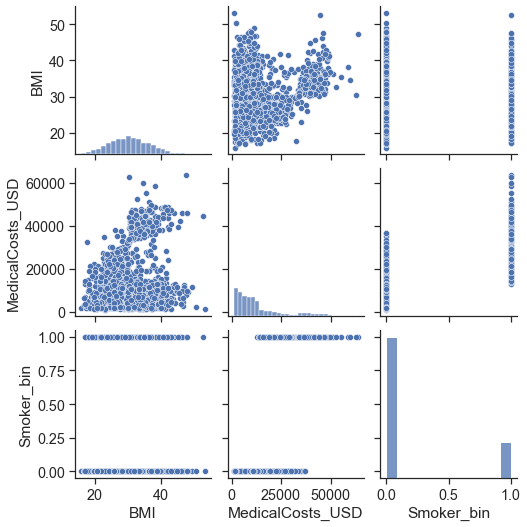

In [111]:
#I am first using the pairplot to visualise various pairwise relationships in the dataset.

sns.pairplot(data=df)

As we can see in the above pairplot, we do not gain much insight into the relationships between these pairs of variables, so we will create other visualizations to better explore the data.

<AxesSubplot:>

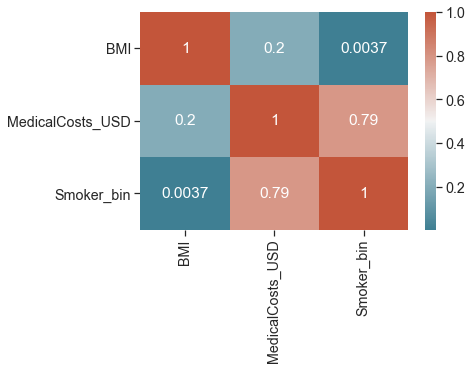

In [130]:
# This is a correlation matrix to analyze the relationship between the variables.

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#Reference - This code was adapted from 
#   https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e


From the above plot, we can see that there is a strong relationship between the the Medical costs and whether the person is a smoker.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Medical Costs in USD')

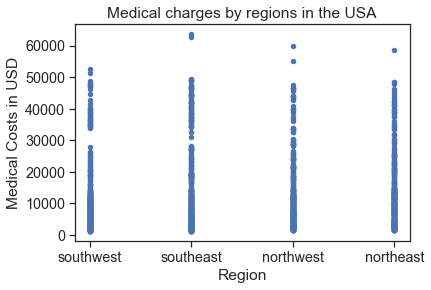

In [134]:
#Creating a scatterplot

df.plot(kind='scatter', x='Region', y='MedicalCosts_USD')
plt.title("Medical charges by regions in the USA")
plt.ylabel("Medical Costs in USD")

The above scatterplot shows us the medical costs of American citizens and their region in the United States. 
We can make note of a couple of observations:
- All the medical costs appear to be in the same range in the different regions, except the 'southwest' region looks to have a higher maximum cost, if we eliminate outliers.
- All the regions except the 'southwest' region have apparent outliers.

[Text(0.5, 1.0, 'Boxplot to compare medical charges by regions in USA'),
 Text(0, 0.5, 'Medical Costs in USD')]

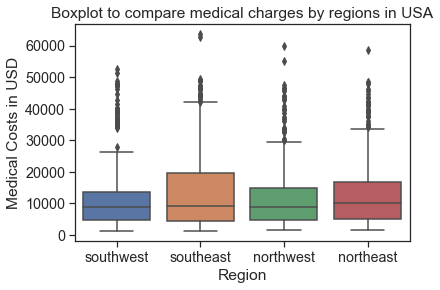

In [138]:
sns.boxplot(data = df, x="Region", y="MedicalCosts_USD").set(title='Boxplot to compare medical charges by regions in USA', ylabel='Medical Costs in USD')

This boxplot helps us better understand and visualize if there is a relationship between the Medical Costs and Regions. 
We can see that the 'southeast' region has the greatest maximum value excluding and including the outliers, which is different from the observation made by the scatterplot. 
The medians also appear to be within the same range of $2000, which does not seem to be a very noticeable difference amongst regions.

<AxesSubplot:xlabel='Region', ylabel='MedicalCosts_USD'>

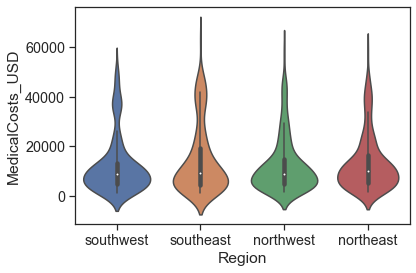

In [120]:
sns.violinplot(x="Region", y="MedicalCosts_USD", data=df)

This violin plot also gives us the same information about the median and the interquartile range as the boxplot. However, we can also observe that the violin is wider around the median, which indicates that the majority of observations (or the costs in this case) are centered around that area. This means that most of the costs in all of the above regions lie in the same range as the medians of their respective regions.

I was also interested in analyzing the data to see if there was a relationship between a smoker and them having increased medical charges.
So, I have created the following plots to explore a relationship, if any.

[Text(0.5, 1.0, 'Boxplot to compare medical costs with a smoker and non-smoker'),
 Text(0, 0.5, 'Medical costs in USD')]

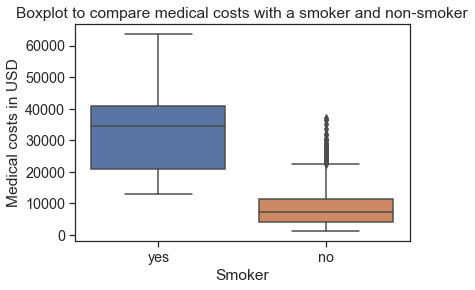

In [145]:
sns.boxplot(data=df, x='Smoker', y='MedicalCosts_USD').set(title='Boxplot to compare medical costs with a smoker and non-smoker',ylabel='Medical costs in USD')

As is evident by the boxplot above, there is clear evidence that a smoker, on average, has higher medical charges in the United States.

[Text(0.5, 1.0, 'Medical Costs by region and smoker'),
 Text(0, 0.5, 'Medical Costs in USD')]

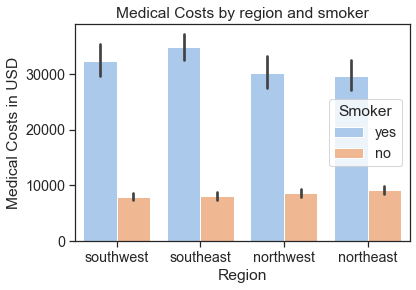

In [148]:
sns.barplot( data = df, x="Region", y="MedicalCosts_USD", palette='pastel', hue='Smoker').set(title='Medical Costs by region and smoker',ylabel='Medical Costs in USD')

[Text(0.5, 1.0, 'Medical Costs by region and smoker'),
 Text(0, 0.5, 'Medical Costs in USD')]

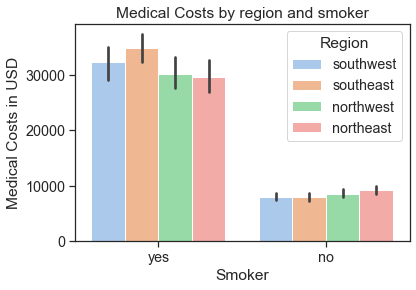

In [151]:
sns.barplot( data = df, x="Smoker", y="MedicalCosts_USD", palette='pastel', hue='Region').set(title='Medical Costs by region and smoker',ylabel='Medical Costs in USD')

The above barplots show the medical costs by regions and smoker. This again reinforces the observation that on average, smokers have higher medical costs.It also shows that for smokers, the 'southeast' region appears to have larger costs, while for non-smokers, the 'northeast' has marginally higher medical costs.